In [ ]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from fnmatch import fnmatch
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
random_state = 123
np.random.seed(random_state)
warnings.simplefilter('ignore')
# sns.set(style='whitegrid')
np.set_printoptions(precision=2, suppress=True)

In [ ]:
class dataset():

    def _files(self):
        images = []
        data = []
        for dirname, _, filenames in os.walk('/content'):
            for filename in filenames:
                path = os.path.join(dirname, filename)
                if fnmatch(path, "*.png") or fnmatch(path, "*.tif"):
                    images.append(path)
                else:
                    data.append(path)

        return images, data

    def instruments(self):
        images = self._files()[0]
        fig, ax = plt.subplots(1, 2, figsize=(50, 80))
        for i in range(2):
            with Image.open(images[i], mode='r') as im:
                im = im.resize((500, 800))
                ax[i].imshow(im)
                ax[i].grid(None)
                fig.show()

    def images(self):
        # Return the subplots of the taken images (first columns)
        # and the pseudo colors of the taken images (rest of the columns)
        images = self._files()[0]
        fig, ax = plt.subplots(8, 4, figsize=(20, 20))
        for i, j in enumerate(images[2:]):
            title = j[68:-4]
            img = mpimg.imread(j)
            ax[i][0].imshow(img)
            ax[i][0].set_title(title + "-RGB")
            for c in range(1, 4):
                ax[i][c].imshow(img[:, :, c-1])
                ax[i][c].set_title(title + "-channel=" + str(c))
        fig.tight_layout()
        plt.show()

    def image(self,
              image=2,
              channel=-1,
              cmap='hot',
              ax=None):
        # Return the image of the different taken
        #  images and change the channels.
        images = self._files()[0]
        _image = images[image]
        title = _image[68:-4]
        img = mpimg.imread(_image)
        if channel < 0:
            img = img
            title_ = title + "-RGB"
        else:
            img = img[:, :, channel]
            title_ = title + "-channel:" + str(channel) + "-cmap:" + str(cmap)
        if ax:
            im = ax.imshow(img, cmap=cmap)
            ax.set_title(title_)
        else:
            plt.imshow(img, cmap=cmap)
            plt.title(title_)



In [ ]:
dt = dataset()._files()[1]
pd.read_csv(dt[0],encoding='latin1')

,SQLite format 3
ø,value BLOB)+?
NaN,NaN
NaN,NaN


In [ ]:
images = dataset()._files()[0]
for i in images:
    im = Image.open(i, mode='r')
    print("Bands of " + i[68:-4])
    print(im.getbands())
    print("box of " + i[68:-4])
    print(im.getbbox())
    print("----------")

Bands of 
('R', 'G', 'B')
box of 
(0, 0, 1155, 2000)
----------
Bands of 
('L',)
box of 
(0, 0, 4685, 4312)
----------


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


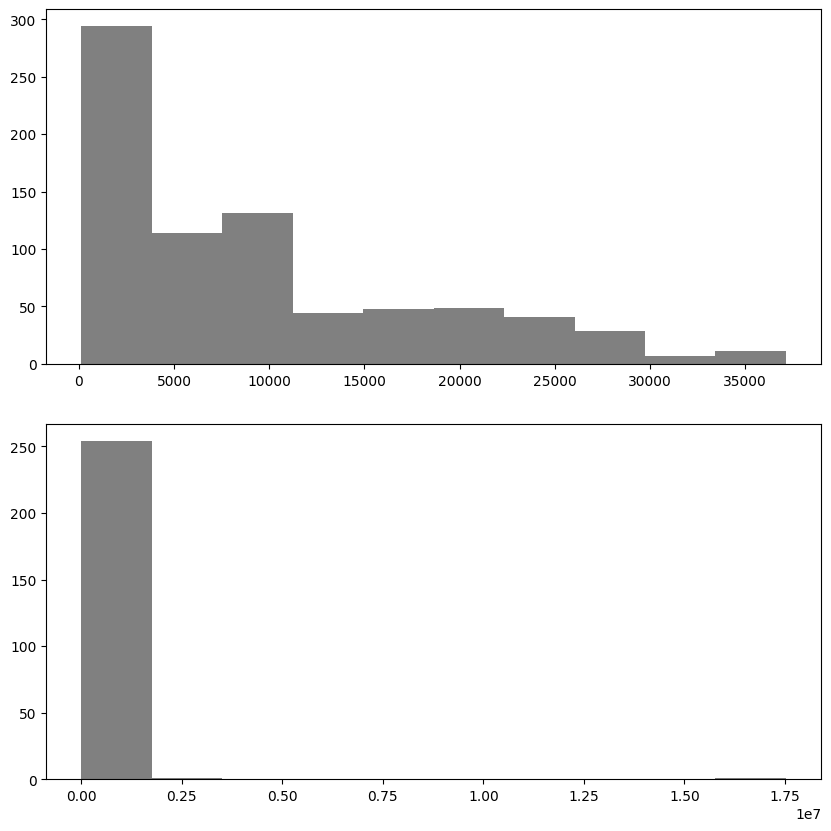

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.17, wspace=0)

images = dataset()._files()[0]
for i, j in enumerate(images):
    im = Image.open(j, mode='r')
    ax[i].hist(im.histogram(), color='gray')
    ax[i].set_title(j[68:-4])

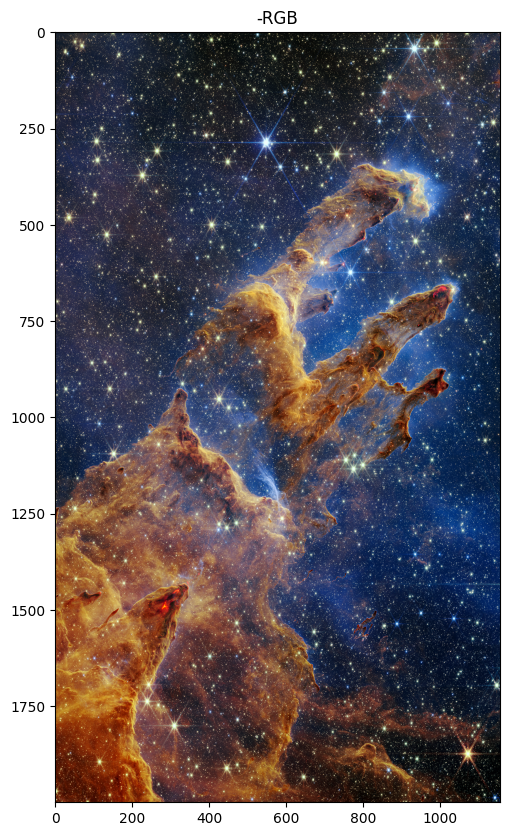

In [ ]:
plt.figure(figsize=(10, 10))
dataset().image(0, -1, "hot")

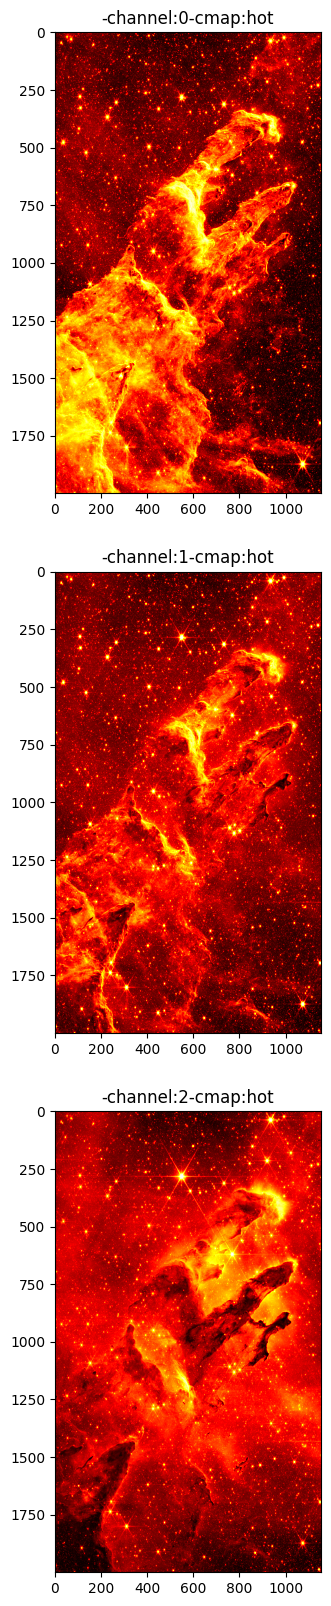

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
fig.subplots_adjust(hspace=0.17, wspace=0)
for i in range(3):
    im = dataset().image(0, i, "hot", ax=ax[i])

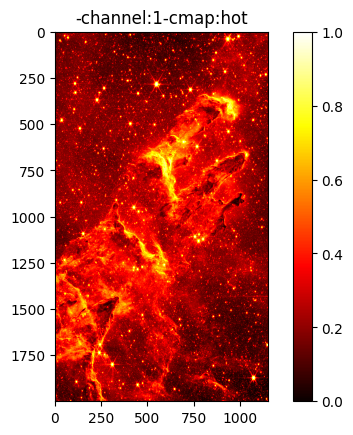

In [ ]:
im = dataset().image(0, 1, "hot", ax=None)
plt.colorbar()

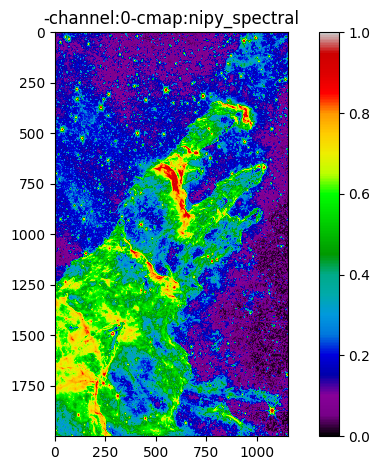

In [ ]:
im = dataset().image(0, 0, "nipy_spectral", ax=None)
plt.colorbar()
plt.tight_layout()

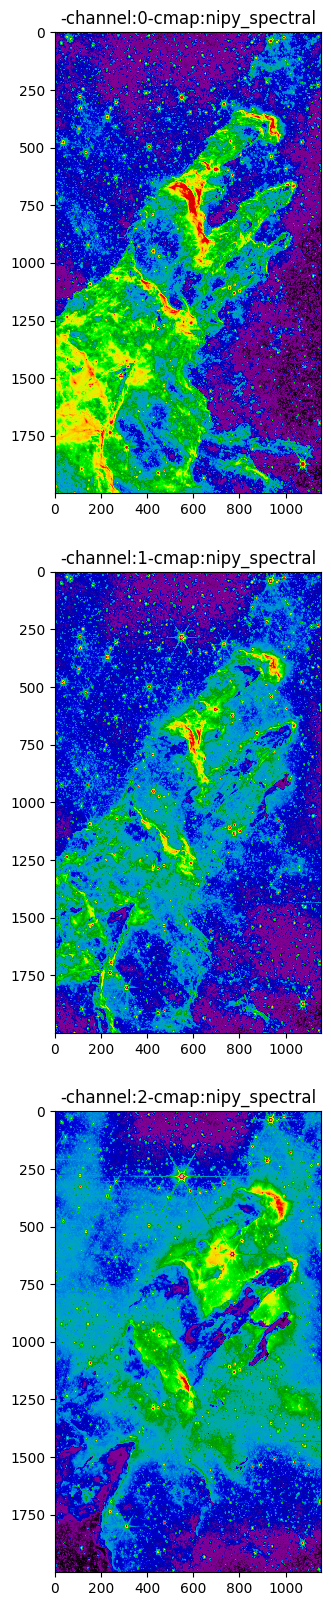

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
fig.subplots_adjust(hspace=0.17, wspace=0)
for i in range(3):
    im = dataset().image(0, i, "nipy_spectral", ax=ax[i])